# Rationale (in progress)

The protein that I am interested in is foxp2 (Forkhead box protein P2) protein, a transcriptional factor. It has been demonstrated to play a key role in learning language, which lead to my hypothesis that foxp2 protein in human has key mutations that allows it to bind to new DNA sequences compared to foxp2 in Chimpanzee. Thus, on the foxp2 phylogenic tree, the distance between human and Chimpanzee will be significantly longer than 'reference distance (mitochondria???)'

# Observation

On the foxp2 phylogenic tree, human and chimp are not even neighbors. And human foxp2 is not that different from other primates.

## potential explanation
** a reverse mutation**
'''However, comparison of the DNA-binding energetics of the monomer and wild-type FHD, reveals that there is a difference in the mechanism of binding between the two species. We conclude that the naturally occurring reverse mutation (P539A) seen in the FOXP subfamily increases DNA binding affinity and may increase the potential for nonspecific binding compared to other FOX family members.'''
reference: https://www.ncbi.nlm.nih.gov/pubmed/26950495

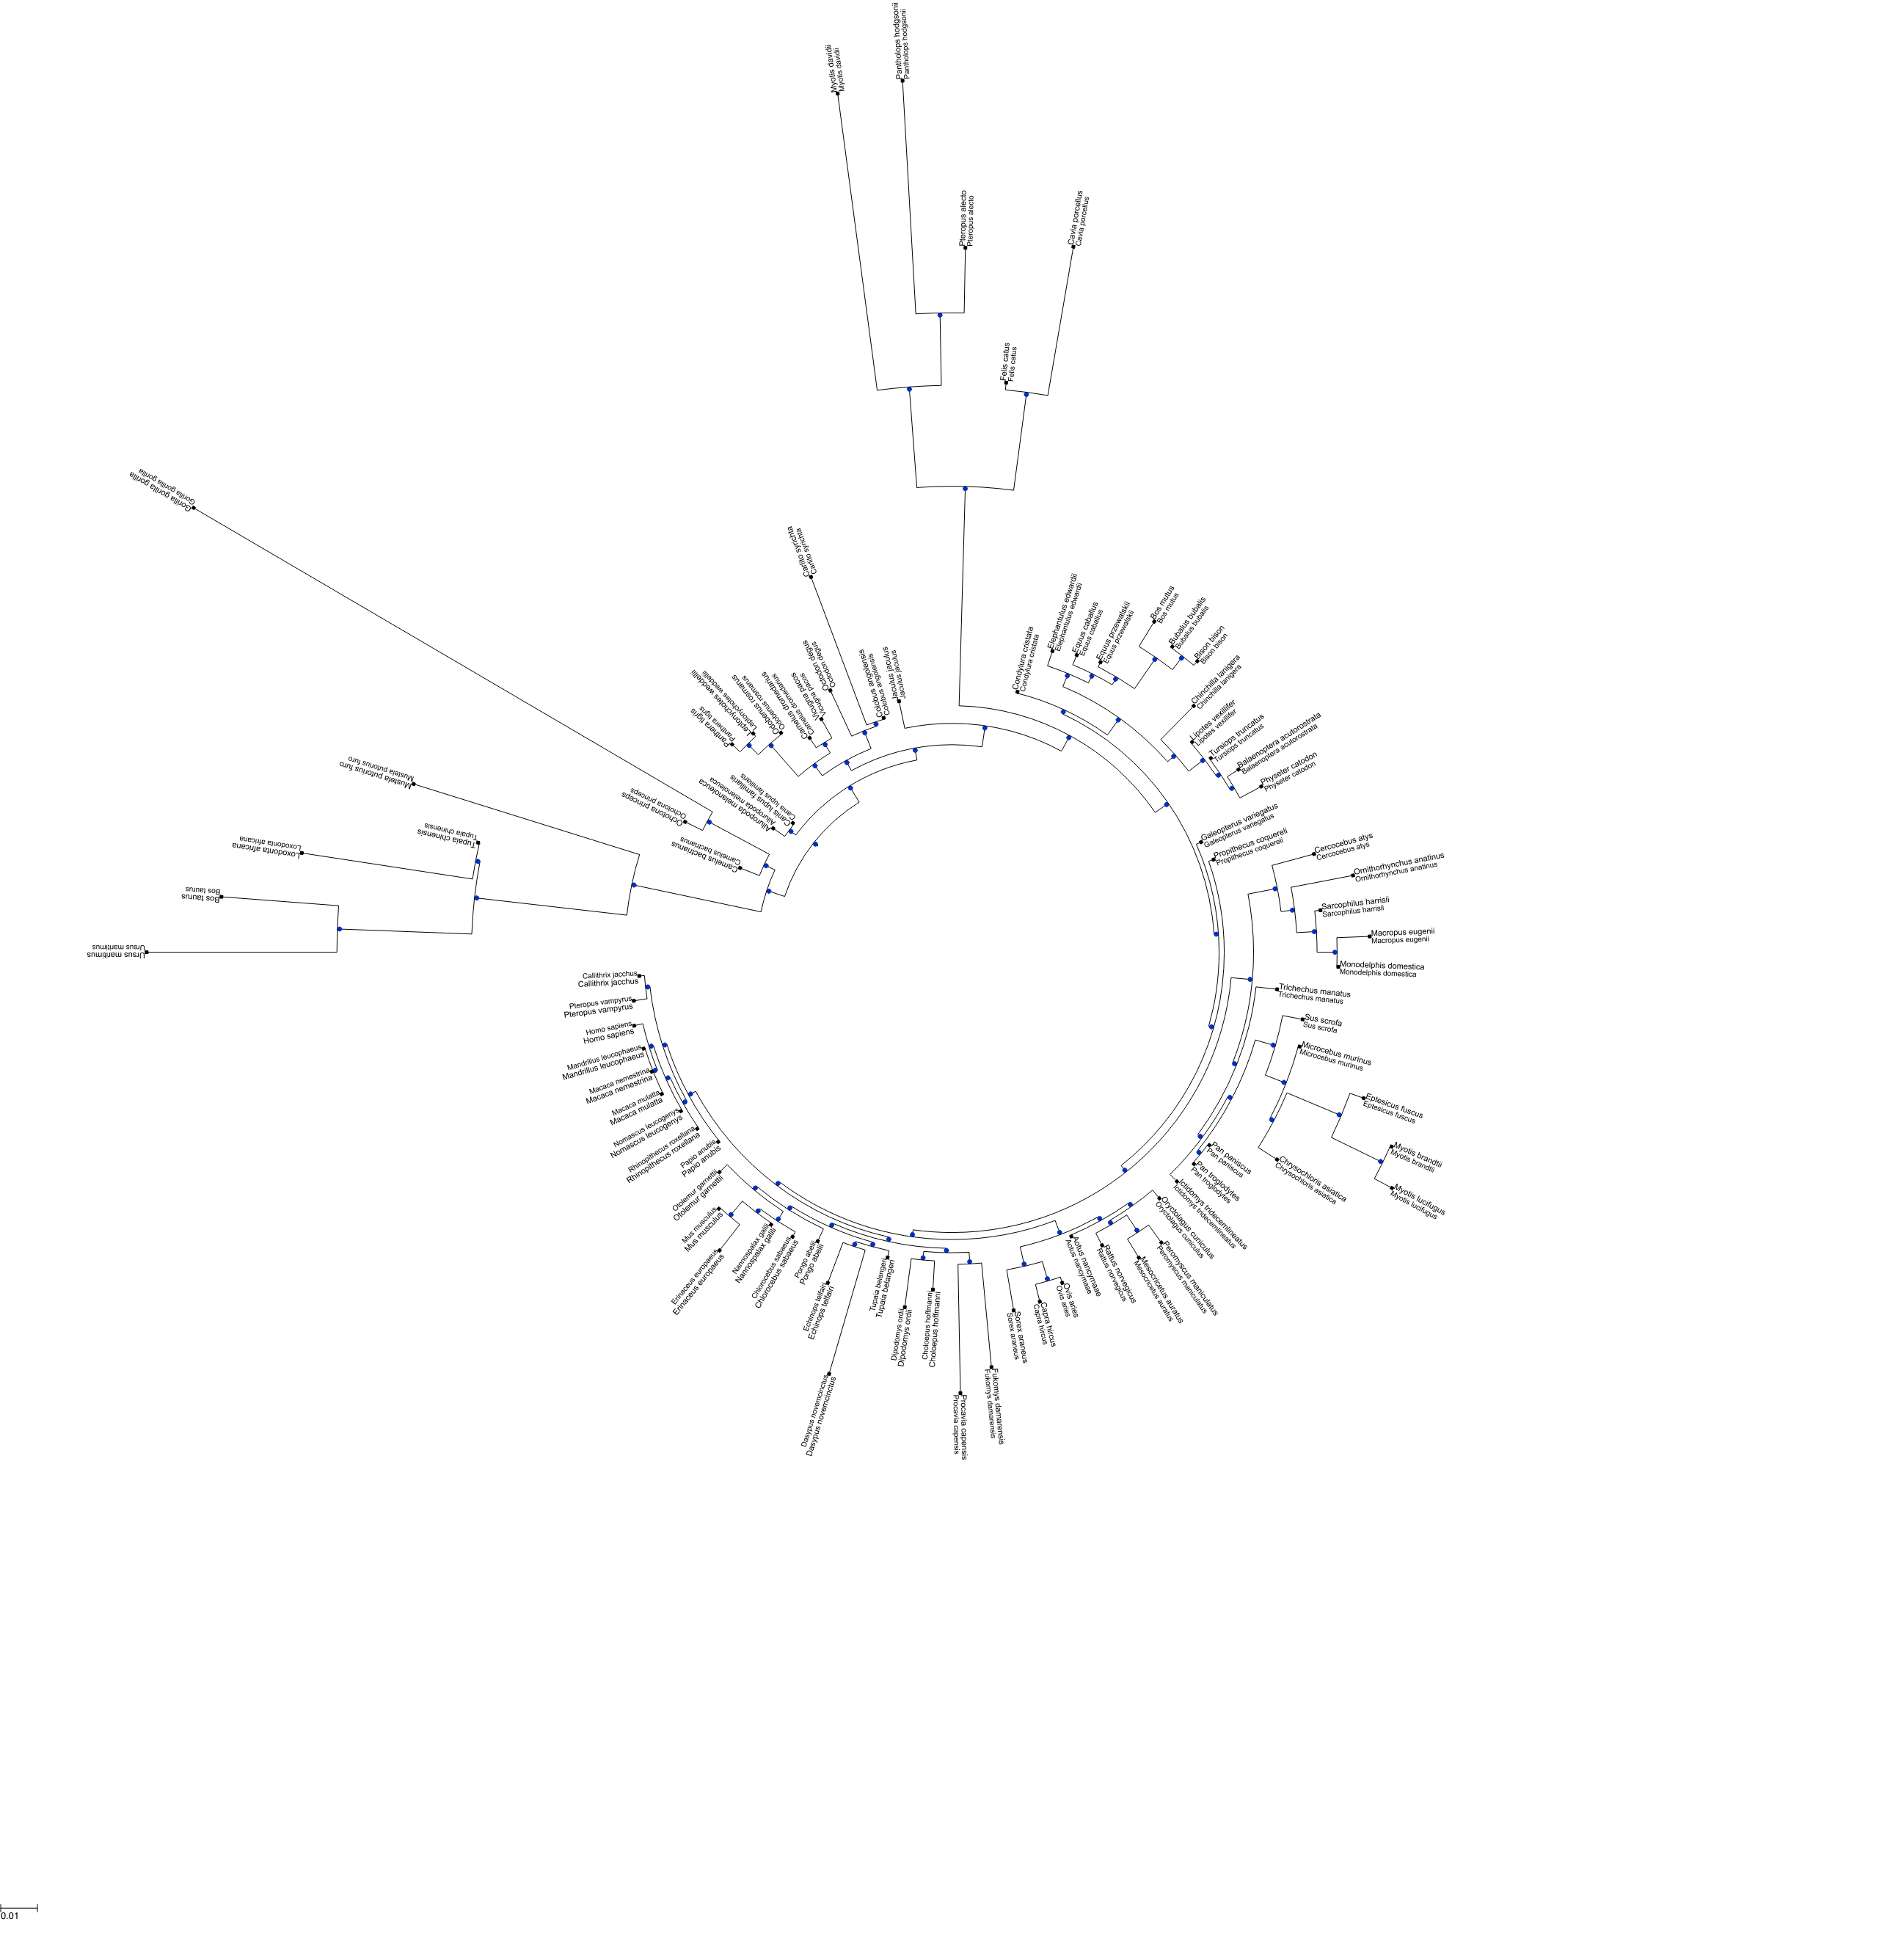

In [3]:
Image('foxp2_circle_tree.png')

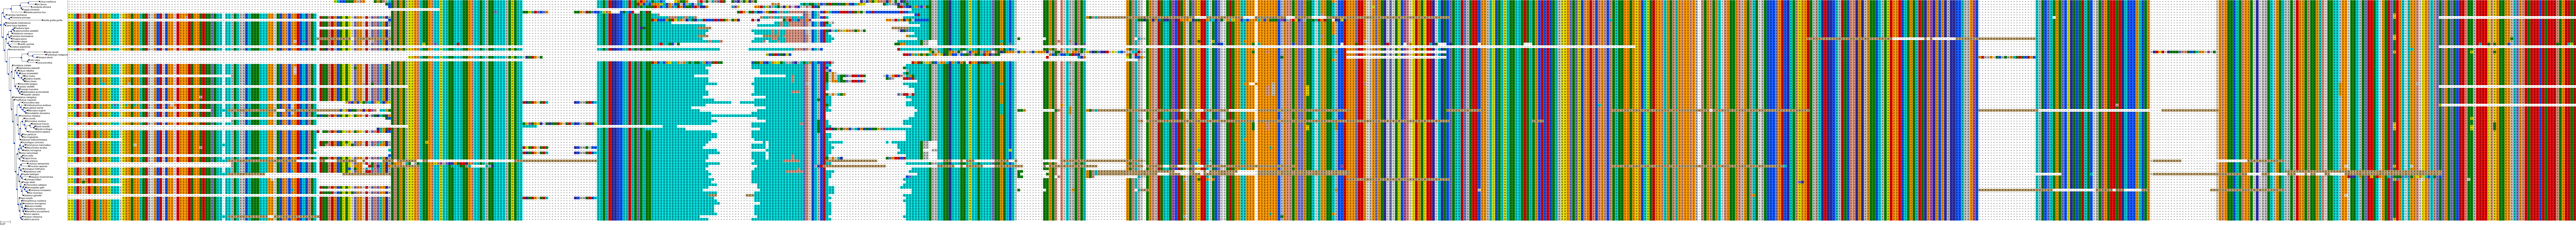

In [9]:
t.render('%%inline')

In [1]:
# Showing the first sequence in downloaded fasta file, notice here the taxo ID is not the traditional NCBI taxo ID.
! head -2 data/foxp2.fasta

>10020:0019a2 {"pub_gene_id":"ENSDORG00000007040", "pub_og_id":"EOG090A05LE", "level":40674, "description":"forkhead box P2 "}
MMQESATETISNSSMNQNGMSTLSSQLDAGSRDGRSSGDTSSEVSTVELLHLQQQQALQAARQLLLQQQTSGLKSPKNSDKQRPLQELLPESKLCVCGHSSGDEHPHNTFAVPVSVAMMTPQVITPQQMQQILQQQVLSPQQLQALLQQQQAVMLQQQQLQEFYKKQQEQLHLQLLQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQPPPPPPHPGKQAKEQQQQQQQQQQLAAQQLVFQQQLIQMQQLQQQQHLLSLQRQGLISIPPGQAALPVQSLPQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSSHEETGASHTLYGHGVCKWPGCESICEDFGQFLKHLNNEHALDDRSTAQCRVQMQVVQQLEIQLSKERERLQAMMTHLHMRPSEPKPSPKPLNLVSSVTMSKNMLETSPQSLPQTPTTPTAPVTPITQGPSVITPASVPNVGAIRRRHSDKYNIPMSSEIAPNYEFYKNADVRPPFTYATLIRQAIMESSDRQLTLNEIYSWFTRTFAYFRRNAATWKNAVRHNLSLHKCFVRVENVKGAVWTVDEVEYQKRRSQKITGSPTLVKNIPTSLGYGAALNASLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHSIHVKEEPVIAEDEDCPMSLVTTANHSPELEDDREIEEEPLSEELE


In [2]:
# To utilize the ncbi database to convert the taxo ID into speicies name,
# I need to get rid of ':0001482' in '>10020:001482'
import re

with open('data/foxp2.fasta', 'r+') as f:
    data = f.read()
    data = re.sub(':\w{6}', '', data)
    f.close()
    
with open('data/foxp2_modified.fasta', 'w') as fwrite:
    fwrite.write(data)
    fwrite.close()

In [3]:
# Check the new format
! head -2 data/foxp2_modified.fasta

>10020 {"pub_gene_id":"ENSDORG00000007040", "pub_og_id":"EOG090A05LE", "level":40674, "description":"forkhead box P2 "}
MMQESATETISNSSMNQNGMSTLSSQLDAGSRDGRSSGDTSSEVSTVELLHLQQQQALQAARQLLLQQQTSGLKSPKNSDKQRPLQELLPESKLCVCGHSSGDEHPHNTFAVPVSVAMMTPQVITPQQMQQILQQQVLSPQQLQALLQQQQAVMLQQQQLQEFYKKQQEQLHLQLLQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQPPPPPPHPGKQAKEQQQQQQQQQQLAAQQLVFQQQLIQMQQLQQQQHLLSLQRQGLISIPPGQAALPVQSLPQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXSSHEETGASHTLYGHGVCKWPGCESICEDFGQFLKHLNNEHALDDRSTAQCRVQMQVVQQLEIQLSKERERLQAMMTHLHMRPSEPKPSPKPLNLVSSVTMSKNMLETSPQSLPQTPTTPTAPVTPITQGPSVITPASVPNVGAIRRRHSDKYNIPMSSEIAPNYEFYKNADVRPPFTYATLIRQAIMESSDRQLTLNEIYSWFTRTFAYFRRNAATWKNAVRHNLSLHKCFVRVENVKGAVWTVDEVEYQKRRSQKITGSPTLVKNIPTSLGYGAALNASLQXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXHSIHVKEEPVIAEDEDCPMSLVTTANHSPELEDDREIEEEPLSEELE


the goal here is to build a standard fasttree using ete3 toolkit
-a indicates we are using a.a. sequences
-o refers to the output folder

'''! ete3 build -w standard_fasttree -a data/foxp2_modified.fasta -o foxp2_tree/ --clearall'''

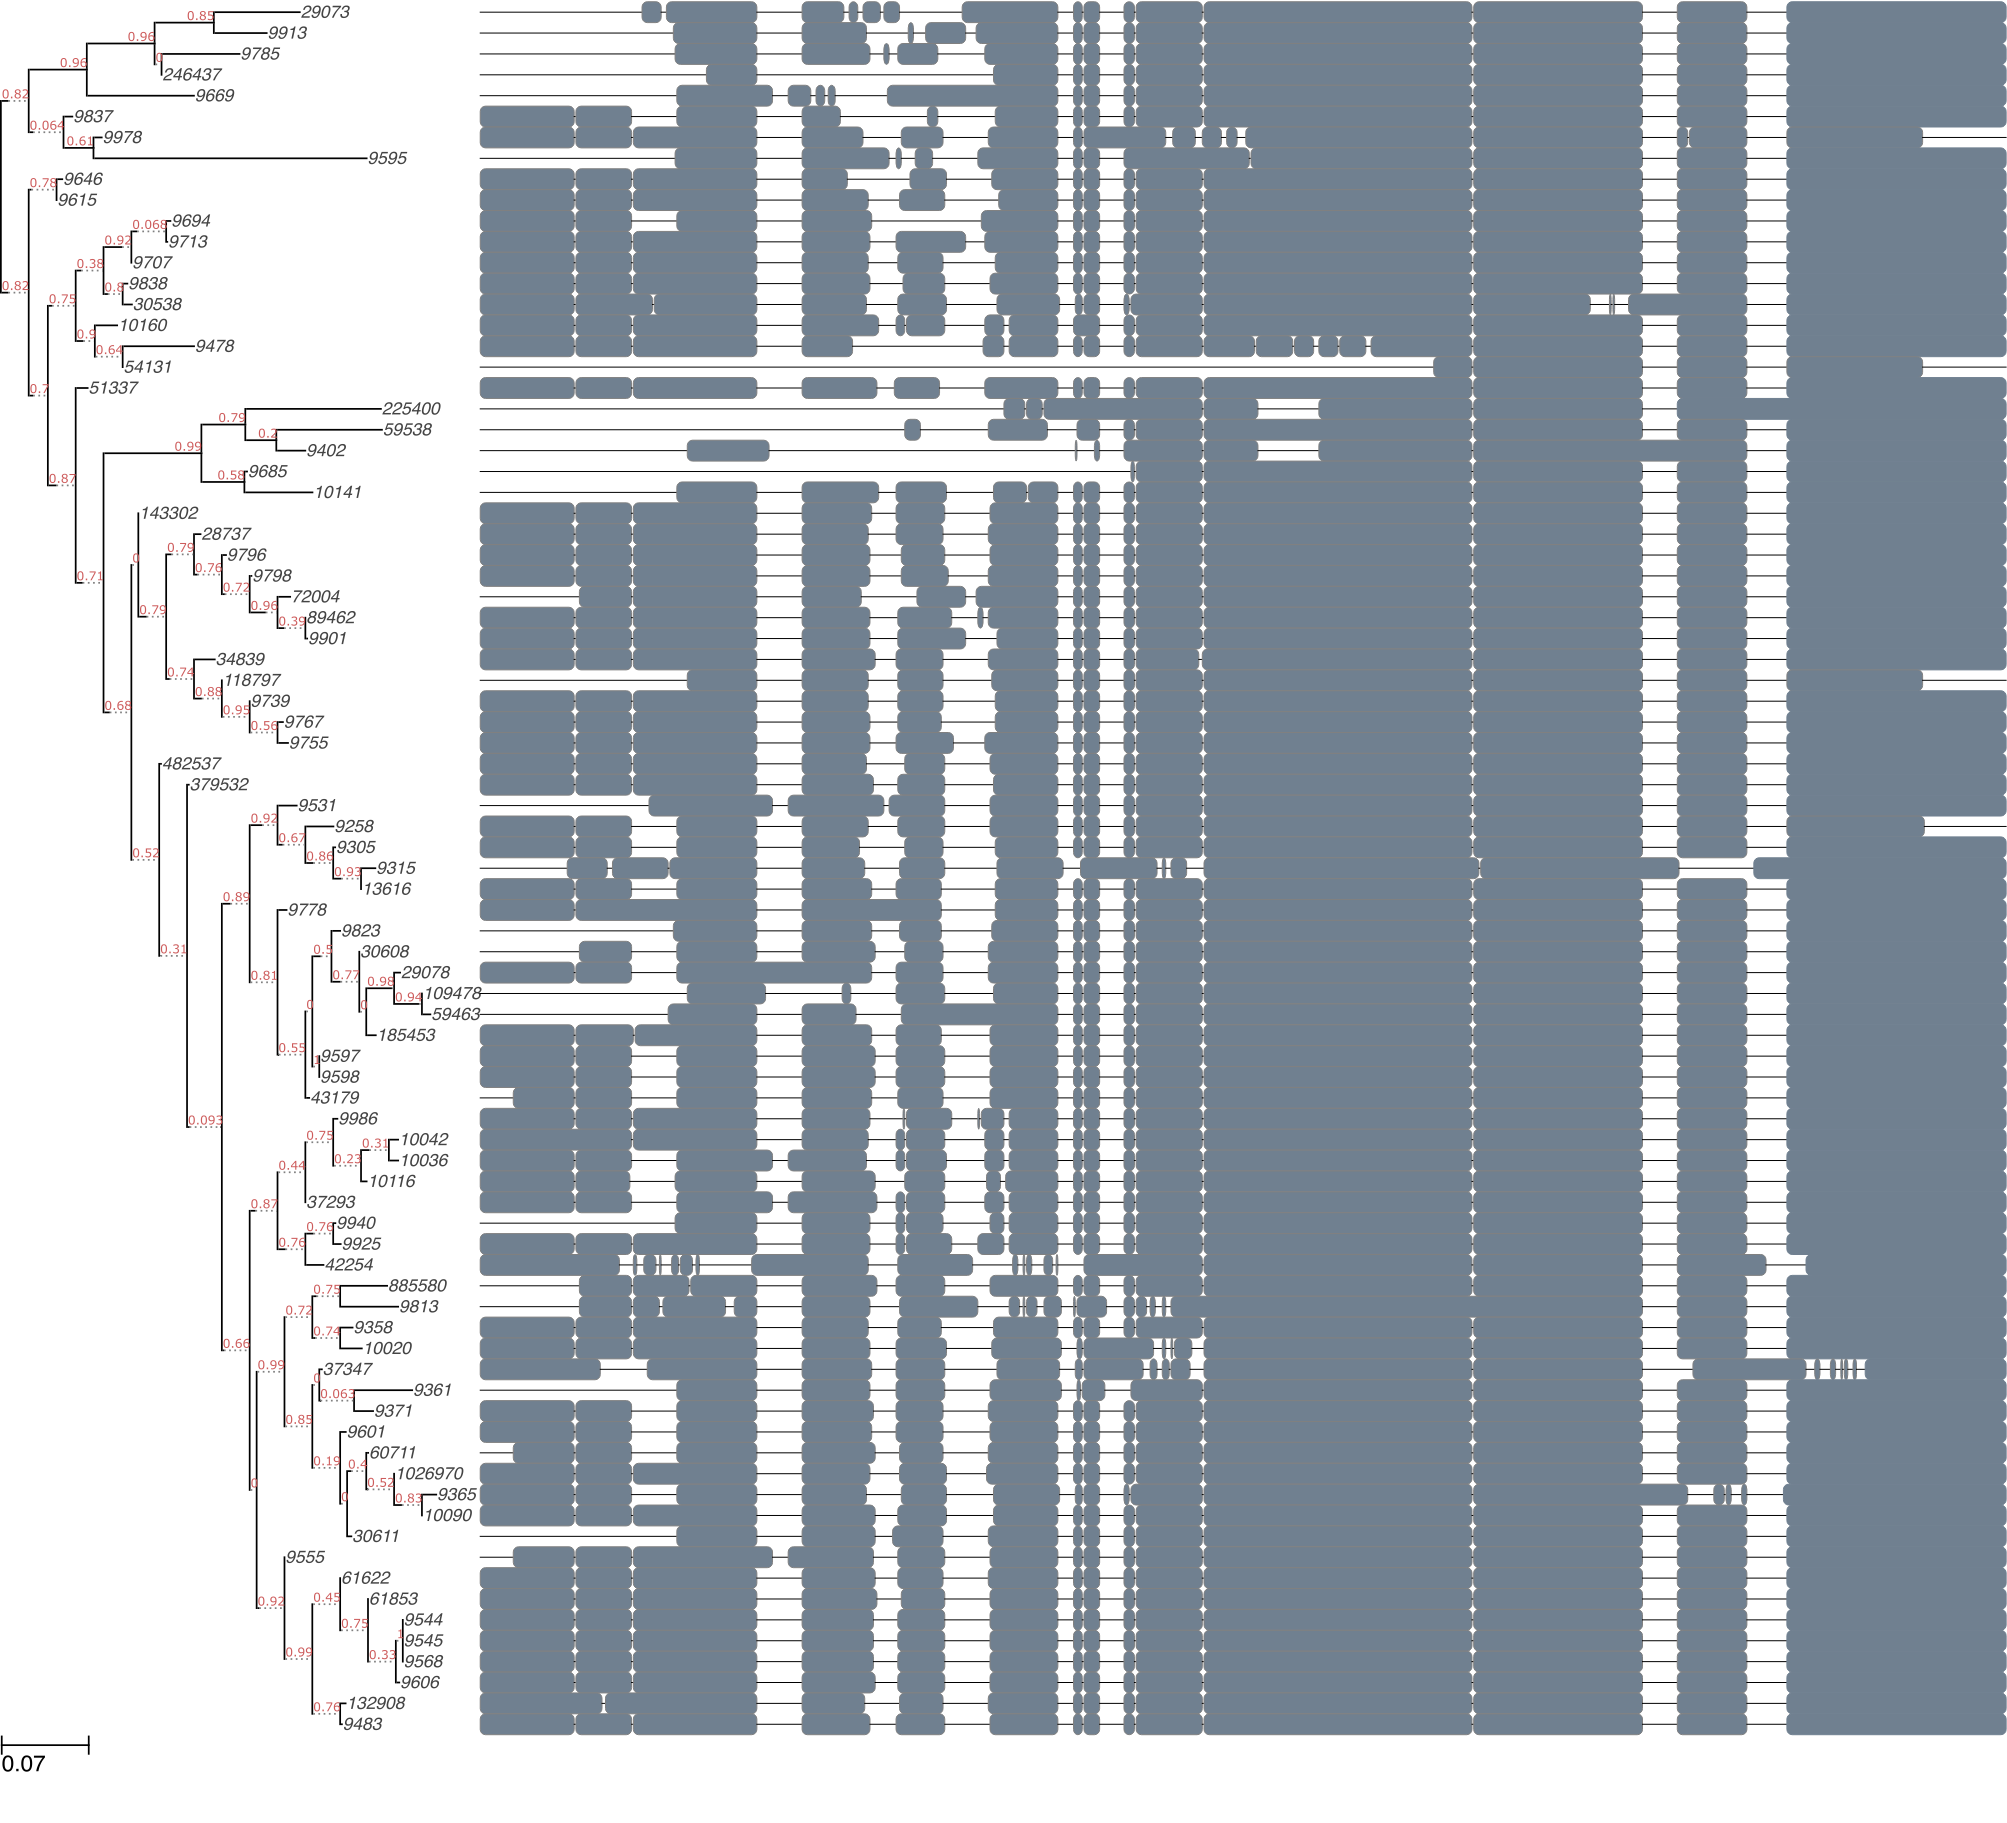

In [2]:
from IPython.display import Image
Image(filename='foxp2_tree/clustalo_default-none-none-fasttree_full/foxp2_modified.fasta.final_tree.png')

In [7]:
! cp foxp2_tree/clustalo_default-none-none-fasttree_full/foxp2_modified.fasta.final_tree.nw foxp2tree.nw

In [5]:
from ete3 import PhyloTree
t = PhyloTree('foxp2tree.nw',
              alignment='foxp2_tree/clustalo_default-none-none-fasttree_full/foxp2_modified.fasta.final_tree.used_alg.fa',
              alg_format="fasta")

In [6]:
t_name_modified = t.annotate_ncbi_taxa(taxid_attr="name")

In [7]:
# The ncbi database ete3 provided cannot categorize '9478' which is Carlito syrichta

for n in t.get_leaves():
    if n.name == '9478':
        n.name = 'Carlito syrichta'
    try:
        n.name = t_name_modified[0][int(n.name)]
    except Exception as e:
        pass

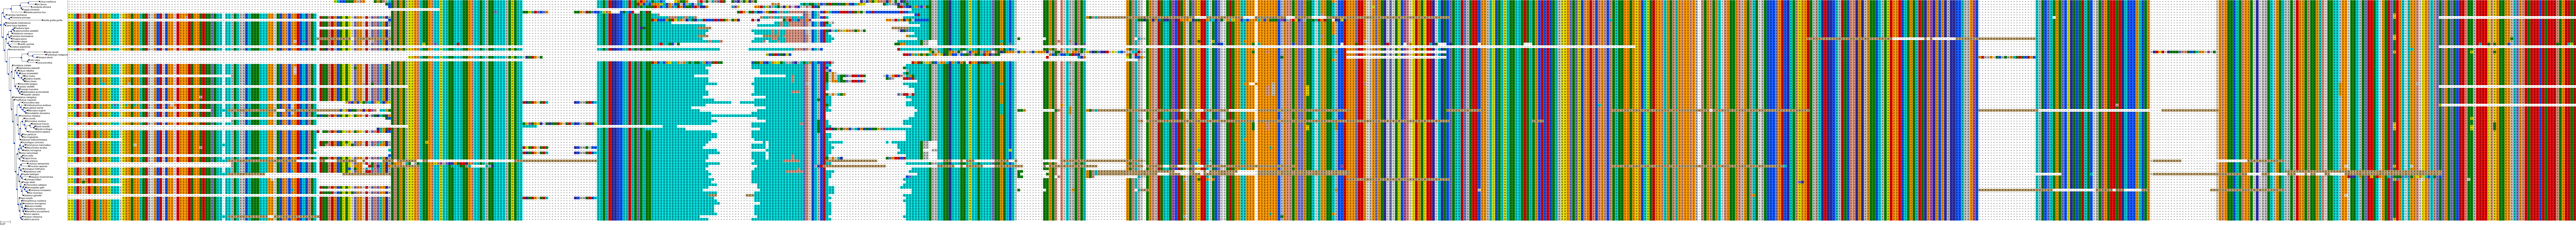

In [8]:
t.render('%%inline')

In [13]:
# there is an update in ncbi taxo database, but the orthodb has not updated yet.
circletree = PhyloTree('foxp2tree.nw')
for n in circletree.get_leaves():
    if n.name == '9478':
        n.name = 'Carlito syrichta'
    try:
        n.name = t_name_modified[0][int(n.name)]
    except Exception as e:
        pass

In [12]:
# from ete3 import Tree, TreeStyle


# ts = TreeStyle()
# ts.show_leaf_name = True
# ts.mode = "c"
# ts.arc_start = -180 # 0 degrees = 3 o'clock
# ts.arc_span = 360
# circletree.render('foxp2_circle_tree.png', tree_style=ts)

In [11]:
# compare the foxp2tree with brcatree
# nRF Normalized Robinson-Foulds distance (RF/maxRF)
# RF Robinson-Foulds symmetric distance
# maxRF maximum Robinson-Foulds value for this comparison

! ete3 compare -t foxp2tree.nw -r brcatree.nw

source          | ref             | E.size  | nRF     | RF      | maxRF   | src-br+ | ref-br+ | subtre+ | treekoD
==============+ | ==============+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+ | ======+
foxp2tree.nw    | brcatree.nw     | 81      | 0.90    | 141.00  | 157.00  | 0.10    | 0.10    | 1       | NA     


In [12]:
# reference: all the species appeared in the tree

for n in t.get_leaves():
    print n.name

Ursus maritimus
Bos taurus
Loxodonta africana
Tupaia chinensis
Mustela putorius furo
Camelus bactrianus
Ochotona princeps
Gorilla gorilla gorilla
Ailuropoda melanoleuca
Canis lupus familiaris
Panthera tigris
Leptonychotes weddellii
Odobenus rosmarus
Camelus dromedarius
Vicugna pacos
Octodon degus
Carlito syrichta
Colobus angolensis
Jaculus jaculus
Myotis davidii
Pantholops hodgsonii
Pteropus alecto
Felis catus
Cavia porcellus
Condylura cristata
Elephantulus edwardii
Equus caballus
Equus przewalskii
Bos mutus
Bubalus bubalis
Bison bison
Chinchilla lanigera
Lipotes vexillifer
Tursiops truncatus
Balaenoptera acutorostrata
Physeter catodon
Galeopterus variegatus
Propithecus coquereli
Cercocebus atys
Ornithorhynchus anatinus
Sarcophilus harrisii
Macropus eugenii
Monodelphis domestica
Trichechus manatus
Sus scrofa
Microcebus murinus
Eptesicus fuscus
Myotis brandtii
Myotis lucifugus
Chrysochloris asiatica
Pan paniscus
Pan troglodytes
Ictidomys tridecemlineatus
Oryctolagus cuniculus
Peromyscus